# Milk Quelity Prediction

https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

In [1]:
import pandas as pd
import sqldf

In [2]:
base_milk = pd.read_csv('milknew.csv')

In [3]:
base_milk_2 = sqldf.run(''' 
select *,
(case
    when grade = 'high' then 1 
    when grade = 'low' then 0
    else 3                     
end) TIP_CTE_BIN from base_milk 
''')

In [4]:
base_milk_3 = sqldf.run('''
select * from base_milk_2 where tip_cte_bin in (1,0)
''')

In [5]:
base_milk_2.columns

Index(['level_0', 'pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity',
       'Colour', 'Grade', 'TIP_CTE_BIN'],
      dtype='object')

In [6]:
base_milk_2.rename(columns = {'Fat ':'fat'}, inplace = True)

In [7]:
import sys

# Add the path to the directory containing your module
sys.path.append("C:\\Users\\my pc\\Documents\\Python\\Clases")

In [8]:
from mccred import model_selection 
ms = model_selection()

In [9]:
base_desarrollo, base_validacion = ms.base_split(base_milk_3)

In [10]:
from mccred_credito import tree_categories
tc = tree_categories()

In [11]:
base_desarrollo.columns

Index(['level_0', 'index', 'pH', 'Temprature', 'Taste', 'Odor', 'Fat ',
       'Turbidity', 'Colour', 'Grade', 'TIP_CTE_BIN'],
      dtype='object')

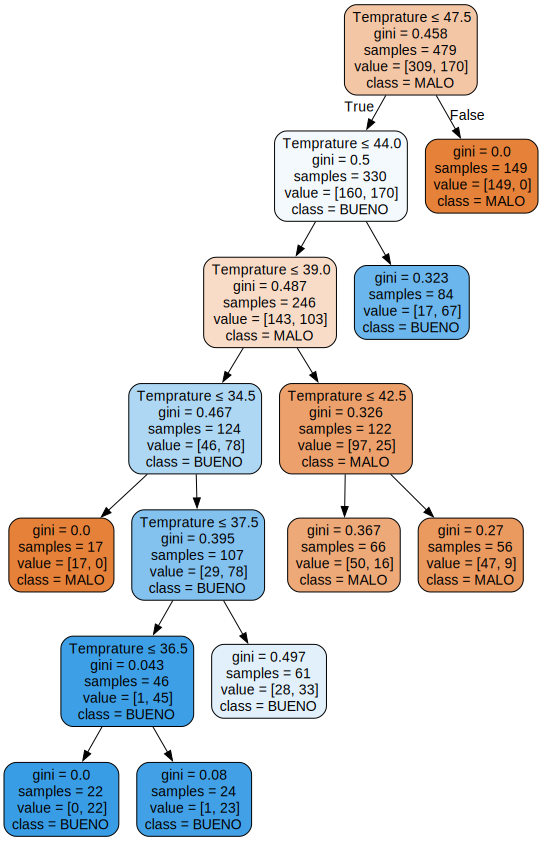

In [12]:
nodos, categ = tc.arbol_categoria(base_desarrollo[['Temprature']], base_desarrollo[['TIP_CTE_BIN']], 2, int(len(base_desarrollo)*0.02))

In [13]:
base_desarrollo.drop(['level_0'], axis = 1, inplace = True)

In [14]:
base_desarrollo.rename(columns = {'Fat ':'fat'}, inplace = True)

In [15]:
base_categ = sqldf.run(''' 
select *,  strftime("%Y-%m-%d", "now") as FECHACORTE, 1 INTERCEPTO, 
(case
    when pH <= 6.05 then 1
    else 2              
end) pH_categ, 
(case
    when temprature <= 39 then 1
    else 2                   
end) temperature_categ, 
(case
    when taste <= 0.5 then 1
    else 2                 
end) taste_categ, 
(case
    when odor <= 0.5 then 1
    else 2             
end) odor_categ, 
(case
    when fat <= 0.5 then 1
    else 2                     
end) fat_categ, 
(case
    when turbidity <= 0.5 then 1
    else 2                 
end) turbidity_categ, 
(case
    when colour in (240, 246, 247, 248) then 1
    when colour in (245, 250, 255) then 2
    else 3                
end) color_categ from base_desarrollo
''')

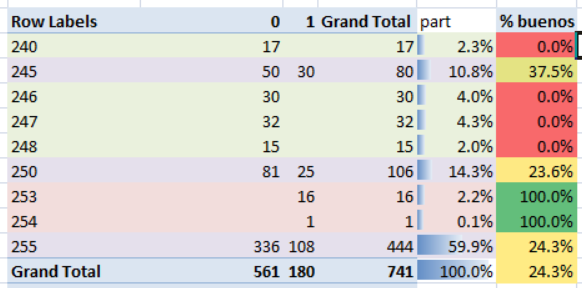

In [16]:
base_categ.columns

Index(['level_0', 'index', 'pH', 'Temprature', 'Taste', 'Odor', 'fat',
       'Turbidity', 'Colour', 'Grade', 'TIP_CTE_BIN', 'FECHACORTE',
       'INTERCEPTO', 'pH_categ', 'temperature_categ', 'taste_categ',
       'odor_categ', 'fat_categ', 'turbidity_categ', 'color_categ'],
      dtype='object')

In [17]:
base_desarrollo_2 = base_categ[['index', 'FECHACORTE', 'TIP_CTE_BIN', 'INTERCEPTO', 'pH_categ',
       'temperature_categ', 'taste_categ', 'odor_categ', 'fat_categ',
       'turbidity_categ', 'color_categ']]

C:\Users\my pc\Documents\Python\Clases\mccred.py:387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.rename(columns = {'index':'IDCTE', 'DATE':'FECHACORTE'}, inplace=True)
c:\Python310\lib\site-packages\scorecardpy\condition_fun.py:34: UserWarning: There are 2 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: FECHACORTE, INTERCEPTO)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

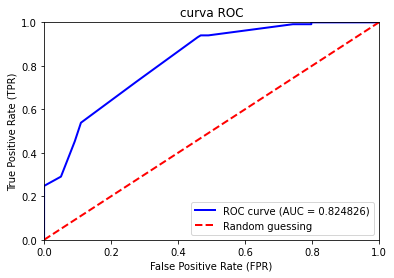

No tiene betas negativas
No tiene altas correlaciones
La ROC de Benchmark es: 0.8248255312475496
La ROC en Validacion de Benchmark es: 0.8087290068422144
La ROC implementable es :0.8248255312475496
La ROC en Validacion implementable es: 0.8087290068422144


c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


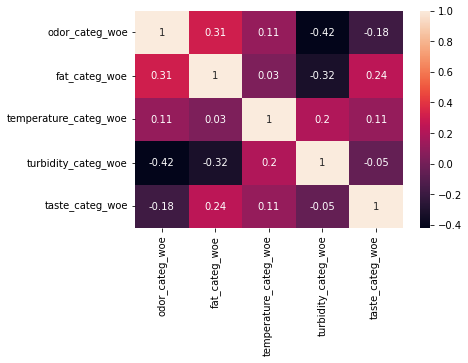

In [18]:
score_card, base_validacion = ms.modelador(base_desarrollo_2, 5)

In [19]:
score_card.drop(['index'], axis =1, inplace = True)

In [20]:
base_milk_2.rename(columns = {'Fat ':'fat'}, inplace = True)

In [21]:
base_pre_categ = sqldf.run(''' 
select *,  strftime("%Y-%m-%d", "now") as FECHACORTE, 1 INTERCEPTO, 
(case
    when pH <= 6.05 then 1
    else 2              
end) pH_categ, 
(case
    when temprature <= 39 then 1
    else 2                   
end) temperature_categ, 
(case
    when taste <= 0.5 then 1
    else 2                 
end) taste_categ, 
(case
    when odor <= 0.5 then 1
    else 2             
end) odor_categ, 
(case
    when fat <= 0.5 then 1
    else 2                     
end) fat_categ, 
(case
    when turbidity <= 0.5 then 1
    else 2                 
end) turbidity_categ, 
(case
    when colour in (240, 246, 247, 248) then 1
    when colour in (245, 250, 255) then 2
    else 3                
end) color_categ from base_milk_2
''')

In [22]:
base_pre_categ.rename(columns = {'index':'IDCTE'}, inplace = True)

In [23]:
from mccred_credito import model_selection
ms1 = model_selection()

In [24]:
base_score = ms1.score(score_card, base_pre_categ)

In [25]:
base_score

,IDCTE,FECHACORTE,TIP_CTE_BIN,SCORE
0,0,2024-05-21,1,59.0
1,1,2024-05-21,1,6.0
2,2,2024-05-21,0,40.0
3,3,2024-05-21,0,7.0
4,4,2024-05-21,3,2.0
...,...,...,...,...
1054,1054,2024-05-21,3,2.0
1055,1055,2024-05-21,1,59.0
1056,1056,2024-05-21,0,40.0
1057,1057,2024-05-21,1,20.0


In [37]:
calif = ms1.calificacion(base_score, -5, 18, 50)
tabla_rendimiento = ms1.tabla_rendimiento_buenos_2(calif)

In [38]:
tabla_rendimiento

,index,CALIFICACION,MALO,BUENO,INDET,TOTAL,TOTAL_BIN,TASA_BUENOS,PART
0,0,A,41,124,67,232,165,0.751515,0.219075
1,1,B,161,121,52,334,282,0.429078,0.315392
2,2,C,227,11,255,493,238,0.046218,0.465534


In [40]:
base_validacion

,IDCTE,FECHACORTE,INTERCEPTO,pH_categ,temperature_categ,taste_categ,odor_categ,fat_categ,turbidity_categ,color_categ,TIP_CTE_BIN
93,945,2024-05-21,1,2,2,1,2,2,2,2,1
320,679,2024-05-21,1,1,2,2,2,2,2,2,0
55,570,2024-05-21,1,2,1,2,1,2,1,2,1
30,128,2024-05-21,1,2,2,1,2,2,2,2,1
449,392,2024-05-21,1,2,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
367,845,2024-05-21,1,2,2,1,1,1,1,1,0
3,664,2024-05-21,1,2,2,2,1,2,2,2,0
291,432,2024-05-21,1,2,2,1,2,2,2,2,0
60,180,2024-05-21,1,2,1,2,2,1,2,2,0
